In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# skopt
#from skopt import BayesSearchCV

#helpers
#import helpers

In [51]:
# load datasets
results_lr = pd.read_csv("Regression.csv")
results_tree = pd.read_csv("Decision_tree.csv")
results_forest = pd.read_csv("Random_forest.csv")

results_bayes_lr = pd.read_csv("bayes_results_lr.csv")
results_bayes_tree = pd.read_csv("bayes_results_tree.csv")
results_bayes_forest = pd.read_csv("bayes_results_forest.csv")

theta_lr = np.max(results_lr['mean_result'])
theta_tree = np.max(results_tree['mean_result'])
theta_forest = np.max(results_forest['mean_result'])

In [52]:
# theta_* for each model
print(theta_lr)
print(theta_tree)
print(theta_forest)

0.7535938655403756
0.8160206358998854
0.8295886928064533


In [53]:
# add new column with mean score with bayes method
results_bayes_lr['mean_result'] = (results_bayes_lr['wynik_zbior_1'] + results_bayes_lr['wynik_zbior_2'] + results_bayes_lr['wynik_zbior_3'] + results_bayes_lr['wynik_zbior_4']) / 4
results_bayes_tree['mean_result'] = (results_bayes_tree['wynik_zbior_1'] + results_bayes_tree['wynik_zbior_2'] + results_bayes_tree['wynik_zbior_3'] + results_bayes_tree['wynik_zbior_4']) / 4
results_bayes_forest['mean_result'] = (results_bayes_forest['wynik_zbior_1'] + results_bayes_forest['wynik_zbior_2'] + results_bayes_forest['wynik_zbior_3'] + results_bayes_forest['wynik_zbior_4']) / 4

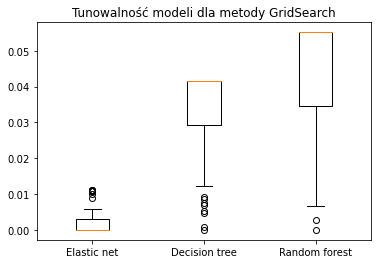

In [70]:
# boxplot dla Gridsearch
boxplot_GridS = [theta_lr - results_lr['mean_result'], theta_tree - results_tree['mean_result'], theta_forest - results_forest['mean_result']]
plt.boxplot(boxplot_GridS,labels=['Elastic net', 'Decision tree', 'Random forest'])
plt.title("Tunowalność modeli dla metody GridSearch")
plt.savefig("gridsearch")

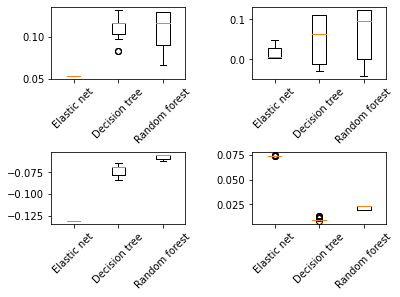

In [43]:
# boxplot Bayes for each model, for delete!!
boxplot_1 = [theta_lr - results_bayes_lr['wynik_zbior_1'],theta_tree - results_bayes_tree['wynik_zbior_1'],theta_forest - results_bayes_forest['wynik_zbior_1']]
boxplot_2 = [theta_lr - results_bayes_lr['wynik_zbior_2'],theta_tree - results_bayes_tree['wynik_zbior_2'],theta_forest - results_bayes_forest['wynik_zbior_2']]
boxplot_3 = [theta_lr - results_bayes_lr['wynik_zbior_3'],theta_tree - results_bayes_tree['wynik_zbior_3'],theta_forest - results_bayes_forest['wynik_zbior_3']]
boxplot_4 = [theta_lr - results_bayes_lr['wynik_zbior_4'],theta_tree - results_bayes_tree['wynik_zbior_4'],theta_forest - results_bayes_forest['wynik_zbior_4']]
name = [boxplot_1,boxplot_2,boxplot_3,boxplot_4]
plt.figsize=(300, 80)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1) 
    plt.subplots_adjust(wspace=0.5)
    plt.boxplot(name[i-1],labels=['Elastic net', 'Decision tree', 'Random forest'])
plt.savefig("tmp1")
plt.show()

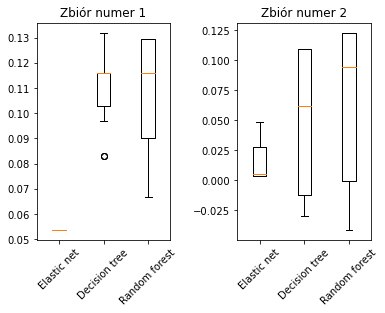

In [56]:
#Bayes for each model
plt.figsize=(30, 8)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1) 
    plt.subplots_adjust(wspace=0.5)
    plt.boxplot(name[i-1],labels=['Elastic net', 'Decision tree', 'Random forest'])
    plt.title(f"Zbiór numer {i}")
plt.savefig("Bayes_M12", bbox_inches="tight")

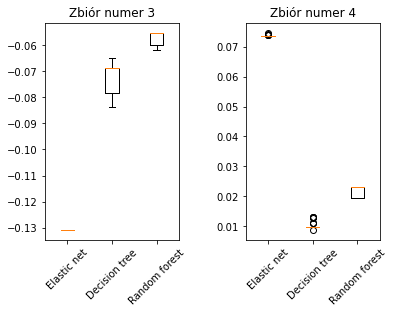

In [57]:
#Bayes for each model
for i in range(1, 3):
    plt.subplot(1, 2, i)
    #plt.figsize=(30, 8)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1) 
    plt.subplots_adjust(wspace=0.5)
    plt.boxplot(name[i+1],labels=['Elastic net', 'Decision tree', 'Random forest'])
    plt.title(f"Zbiór numer {i+2}")
plt.savefig("BayesM34", bbox_inches="tight")

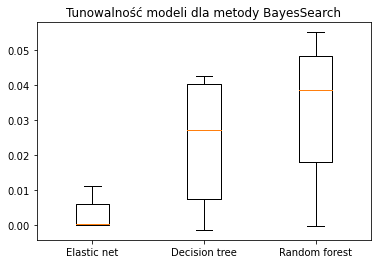

In [71]:
# Bayes for mean
Bayes_mean = [theta_lr - results_bayes_lr['mean_result'], theta_tree - results_bayes_tree['mean_result'], theta_forest - results_bayes_forest['mean_result']]
plt.boxplot(Bayes_mean, labels=['Elastic net', 'Decision tree', 'Random forest'])
plt.figsize=(10, 6)
plt.title("Tunowalność modeli dla metody BayesSearch")
plt.savefig("Bayes_mean")